Этапы CRISP-DM:

1. Анализ требований (Business Understanding) +

2. Исследование данных (Data Understanding) +

3. Подготовка данных (Data Preparation)

4. Моделирование (Modeling)

5. Оценка (Evaluation)

6. Внедрение (Deployment)

# 1. Анализ требований
Задача проекта - Предсказание оттока клиентов банка

### Необходимые библиотеки:

In [ ]:
# Импортируем библиотеки для работы с матрицами и числовыми данными
import numpy as np  # для матричных вычислений и работы с массивами
# Импортируем библиотеку pandas для анализа и предобработки данных (работа с DataFrame)
import pandas as pd  # для загрузки, обработки и анализа табличных данных
# Импортируем matplotlib для создания графиков и визуализации данных
import matplotlib.pyplot as plt  # основной модуль для построения графиков
# Импортируем seaborn для создания стильных и информативных визуализаций
import seaborn as sns  # библиотека на основе matplotlib для улучшенной визуализации
# Импортируем модуль для линейных моделей из scikit-learn
from sklearn import linear_model  # для обучения и использования линейной регрессии
# Импортируем модуль метрик для оценки качества моделей
from sklearn import metrics  # для расчёта метрик, таких как MSE, R² и MAE
# Импортируем функцию для разбиения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split  # для разбиения данных на train/test
# Импортируем модуль для стандартизации/нормализации данных
from sklearn import preprocessing

### Знакомство с данными

1. RowNumber — номер строки таблицы;
2. CustomerId — идентификатор клиента;
3. Surname — фамилия клиента;
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
5. Geography — страна проживания клиента (банк межнациональный);
6. Gender — пол клиента;
7. Age — возраст клиента;
8. Tenure — сколько лет клиент пользуется банком;
9. Balance — сколько у клиента денег на счетах в банке;
10. NumOfProduct — число услуг банка, которыми воспользовался клиент;
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
12. IsActiveMember — есть ли у клиента статус «активный клиент» (1 — да, 0 — нет);
13. EstimatedSalary — предполагаемая заработная плата клиента;
14. Exited — статус ушедшего (1 — ушедший клиент, 0 — лояльный клиент).

In [2]:
churn_data = pd.read_csv('Data/churn.csv')

display(churn_data.head())
print()
print(churn_data.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



(10000, 14)


Проверяем на пропуски

In [3]:
print(churn_data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Посмотрим на признаки с точки зрения категориальных и числовых признаков 

In [10]:
categorical_features = churn_data.select_dtypes(include='object').columns
print(categorical_features)

print()
numerical_features = churn_data.select_dtypes(include='int64').columns
print(numerical_features)

Index(['Surname', 'Geography', 'Gender'], dtype='object')

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'],
      dtype='object')


Общая информация по нашему дата сету

In [13]:
display(churn_data.describe(include='object'))
print()
display(churn_data.describe())

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Проверим сбалансированность данных.

Проверка на сбалансированность данных — это анализ распределения классов в целевой переменной (в задачах классификации) для выявления дисбаланса. Дисбаланс означает, что один или несколько классов представлены значительно чаще, чем другие. Это может привести к тому, что модель будет склоняться к более частым классам, игнорируя редкие.

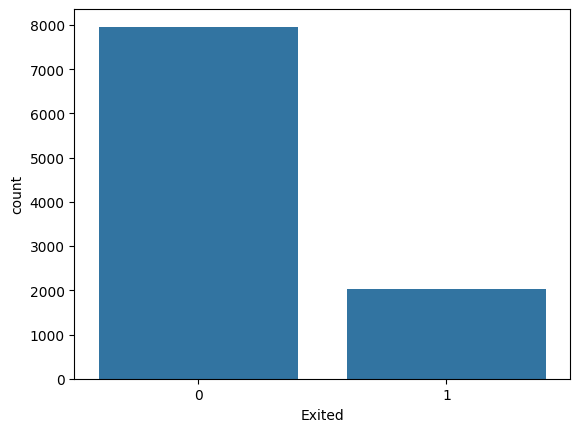

In [18]:
sns.countplot(data=churn_data, x='Exited');